# Tugas </br>
<ol>
<li>Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.</li>
<li>Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,</li>
  <ol>
  <li>Menggunakan data spam.csv</li>
  <li>Fitur CountVectorizer dengan mengaktifkan stop_words</li>
  <li>Evaluasi hasilnya</li>
  </ol>
<li>Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,</li>
  <ol>
  <li>Menggunakan data spam.csv</li>
  <li>Fitur TF-IDF dengan mengaktifkan stop_words</li>
  <li>Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.</li>
  <li>Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv</li>
  </ol>
</ol>

<h1>No 1

Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

Load Dataset

In [2]:
df = pd.read_csv('assets/dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing Data

In [5]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [7]:
df.shape

(3168, 21)

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


Korelasi

Text(0.5, 1.0, 'Correlation Heatmap')

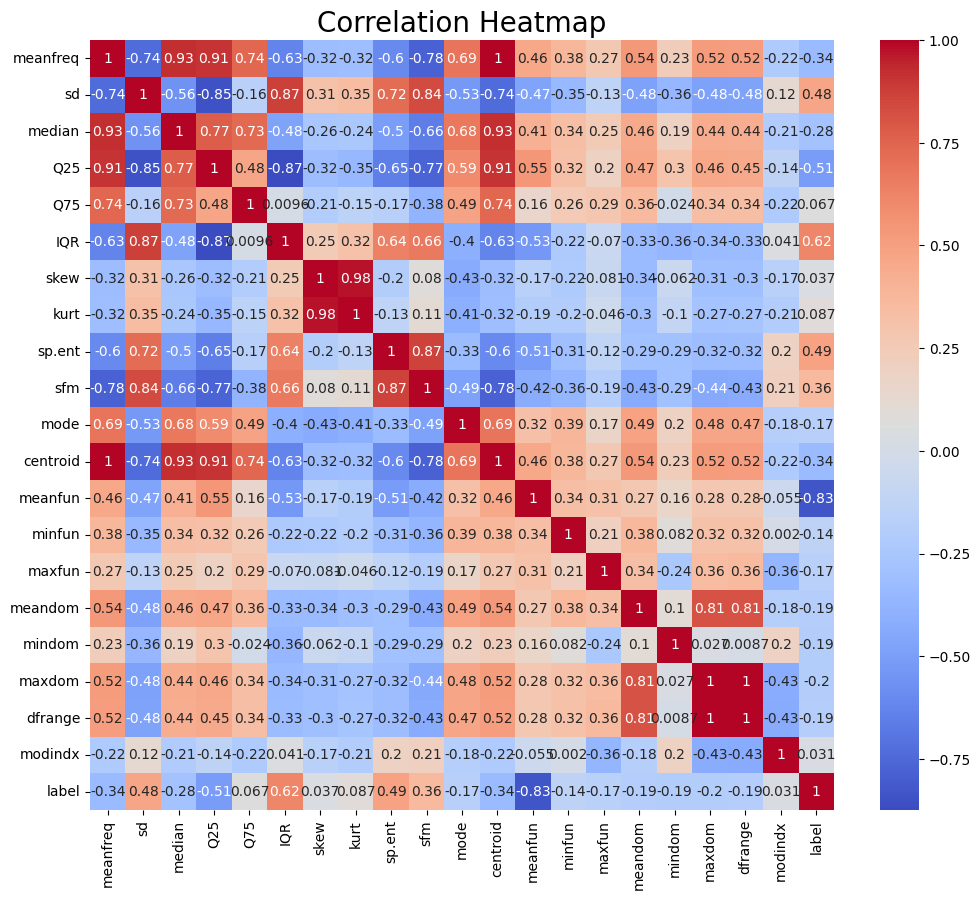

In [11]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)

In [12]:
corr_rank = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
print(corr_rank[corr_rank['level_0'] == 'label'])

    level_0   level_1         0
22    label     label  1.000000
45    label   meanfun  0.833921
90    label       IQR  0.618916
120   label       Q25  0.511455
125   label    sp.ent  0.490552
136   label        sd  0.479539
206   label       sfm  0.357499
226   label  meanfreq  0.337415
227   label  centroid  0.337415
288   label    median  0.283919
349   label    maxdom  0.195657
354   label    mindom  0.194974
360   label   dfrange  0.192213
364   label   meandom  0.191067
374   label      mode  0.171775
379   label    maxfun  0.166461
392   label    minfun  0.136692
408   label      kurt  0.087195
418   label       Q75  0.066906
427   label      skew  0.036627
430   label   modindx  0.030801


Split Data

In [13]:
X = df.drop('label', axis=1)
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling SVM

In [15]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Prediksi Data Testing

In [17]:
y_pred = svm_model.predict(X_test)

Tes Akurasi

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9416403785488959


In [20]:
print("Clasification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Clasification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       297
           1       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

Confusion Matrix:
 [[265  32]
 [  5 332]]


<h1>No 2

Load Dataset

In [23]:
df = pd.read_csv('assets/dataset/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Preprocessing Data

In [26]:
df = df.drop(df.iloc[:, 2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
new_columns = {'v1' : 'labels','v2' : 'SMS'}
df = df.rename(columns=new_columns)
df.head()

,labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])
df.head()

,labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Split Data

In [33]:
X = df['SMS'].values
y = df['labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vectorize Feature

In [34]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


Training Data

In [52]:
mnb = MultinomialNB()

mnb.fit(X_train_vec, y_train)

y_pred_train = mnb.predict(X_train_vec)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test_vec)
acc_test = accuracy_score(y_test, y_pred_test)

print("Accuracy: {:.2f}%".format(acc_train * 100))
print('Accuracy on train data: ', acc_train)
print('Accuracy on test data: ', acc_test)

Accuracy: 99.46%
Accuracy on train data:  0.9946152120260264
Accuracy on test data:  0.9838565022421525


<h1>No 3

Vectorize Feature

In [54]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


Training Data

In [56]:
mnb = MultinomialNB()

mnb.fit(X_train_tfidf, y_train)

y_pred_train = mnb.predict(X_train_tfidf)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test_tfidf)
acc_test = accuracy_score(y_test, y_pred_test)

print("Accuracy: {:.2f}%".format(acc_train * 100))
print('Accuracy on train data: ', acc_train)
print('Accuracy on test data: ', acc_test)

Accuracy: 98.38%
Accuracy on train data:  0.9838456360780794
Accuracy on test data:  0.9668161434977578


<h2>Kesimpulan</h2>

Model MNB dengan CountVectorizer menunjukkan akurasi yang lebih tinggi dibandingkan dengan Model MNB TF-IDF, dengan akurasi CountVectorizer sebesar 99.46% dan TF-IDF sebesar 98.38%. Selain itu, CountVectorizer juga memberikan F1-score yang lebih baik untuk pesan spam. Kesimpulannya, Model MNB dengan CountVectorizer lebih efisien dalam membedakan pesan spam dan ham dalam data uji.





